# Set-up

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)



## Real Code

In [3]:
image = cv2.imread('DropletPNGS/30_30_1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()

In [4]:
# Generate the mask generator object
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device="cpu")

mask_generator = SamAutomaticMaskGenerator(sam)


In [5]:
masks = mask_generator.generate(image)

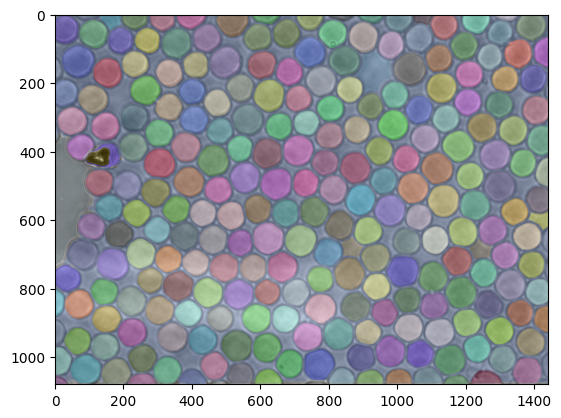

In [6]:
plt.imshow(image)
show_anns(masks)
plt.show()

In [30]:
# print(masks[0])
print(masks[0].keys())
print(masks[0]["point_coords"])

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
[[22.5, 151.875]]


In [11]:
import json 
# with open("pog.json", "w") as pog:
#     json.dump(masks[0],pog)

TypeError: Object of type ndarray is not JSON serializable